# Unsupervised Learning Project: Stocks Analysis with Clustering - Ike Imala

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. Below are data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. The task here is to analyzing the data, group the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

In [ ]:
# Code to mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/stock_data.csv')

## Data Overview

- Observations
- Sanity checks

In [ ]:
# Show top 5 rows of the dataset
data.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [ ]:
# showing bottom 5 rows of the dataset
data.tail()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.259998,14.887727,1.845149,15,459,-1032187000,-4359082000,-4.64,939457327.6,28.976191,6.261775
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,435353535.4,17.682214,-3.838260
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.589996,9.347683,1.404206,1,100,376000000,147000000,0.78,188461538.5,131.525636,-23.884449
338,ZION,Zions Bancorp,Financials,Regional Banks,27.299999,-1.158588,1.468176,4,99,-43623000,309471000,1.20,257892500.0,22.749999,-0.063096
339,ZTS,Zoetis,Health Care,Pharmaceuticals,47.919998,16.678836,1.610285,32,65,272000000,339000000,0.68,498529411.8,70.470585,1.723068


In [ ]:
# Displaying sample of the data
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


In [ ]:
## Checking the shape of dataset

rows=data.shape[0]
cols=data.shape[1]
print('Rows:' + str(rows))
print('columns:' + str(cols))

Rows:340
columns:15


######**Observation: There are 340 rows and 15 columns**

### Checking the data types of the columns for the dataset

In [ ]:
# checking the column names and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

######**Observation: There are 7 Float type, 4 integer type and 4 object data type column in the dataframe**

### Creating a copy of original data

In [ ]:
# Copy original data to another variable to avoid any changes to original data
df = data.copy()

### Checking for duplicate values

In [ ]:
# check duplicate values
df.duplicated().sum()

0

######**Observations: There are no duplicate values present**

### Checking for missing values

In [ ]:
# check for missing values
df.isna().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

######**Observations: There are no missing values present**

### Statistical summary of the dataset

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


**Observations**

- There are 340 rows indicating publicly traded shares of a particular stock on a particular stock market from 11 GICS sector and 104 GICS sub-industry
- Most of the variables shows financial indicator and performance of a company stock in various sectors of the economy.
- The volatility of the stocks for all sector within the past 13 weeks ranges from 0.7% to 4.5% maximum, with an average of 1.4%


## Exploratory Data Analysis (EDA)



### Univariate analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**`1. What does the distribution of stock prices look like?`**

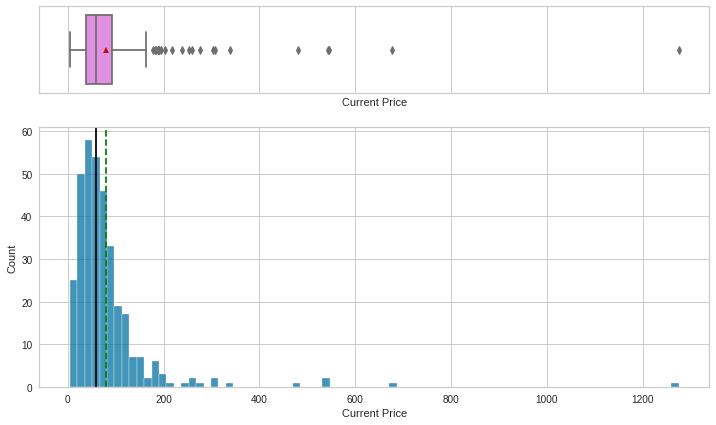

In [ ]:
# histogram_boxplot for Current Stock Price
histogram_boxplot(df, 'Current Price')

The distribution of stock price is skewed to the right with an average stock price of 55 dollars, with few outliers present**

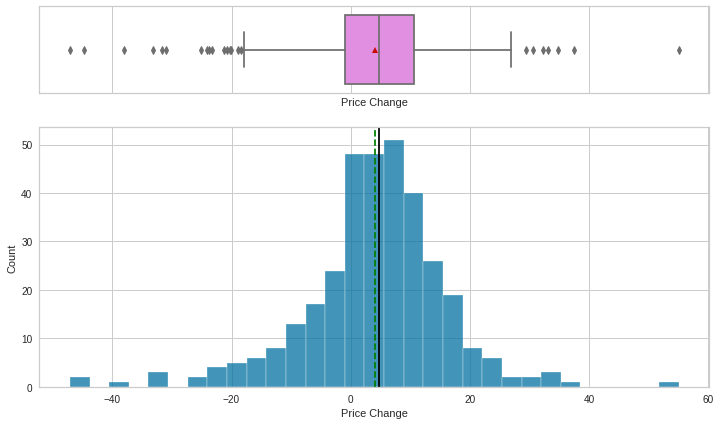

In [ ]:
# histogram_boxplot for Price Change
histogram_boxplot(df, 'Price Change')

**Observation: The stock price change appears to have a some what normal distribution with average of 5% price change in the past 13 weeks**

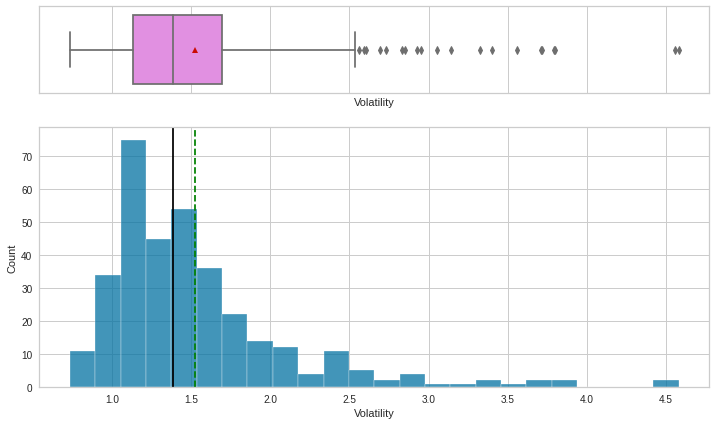

In [ ]:
# histogram_boxplot for Volatility
histogram_boxplot(df, 'Volatility')

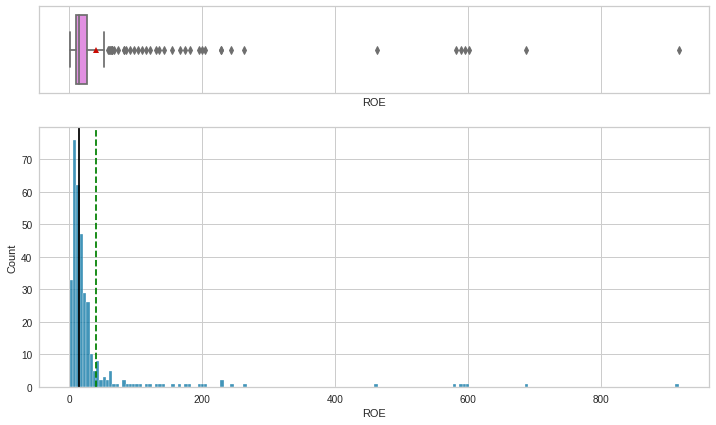

In [ ]:
# histogram_boxplot for ROE
histogram_boxplot(df, 'ROE')

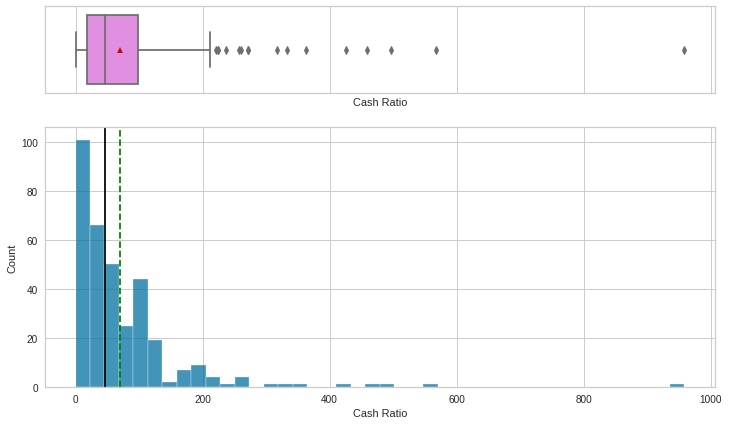

In [ ]:
# histogram_boxplot for Cash Ratio
histogram_boxplot(df, 'Cash Ratio')

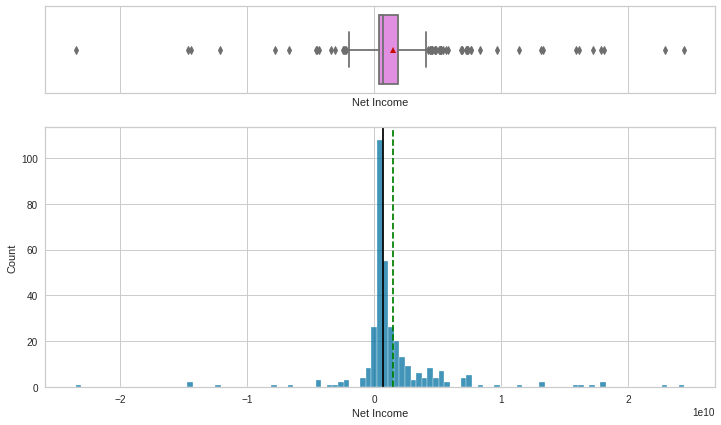

In [ ]:
# histogram_boxplot for Net Income Ratio
histogram_boxplot(df, 'Net Income')

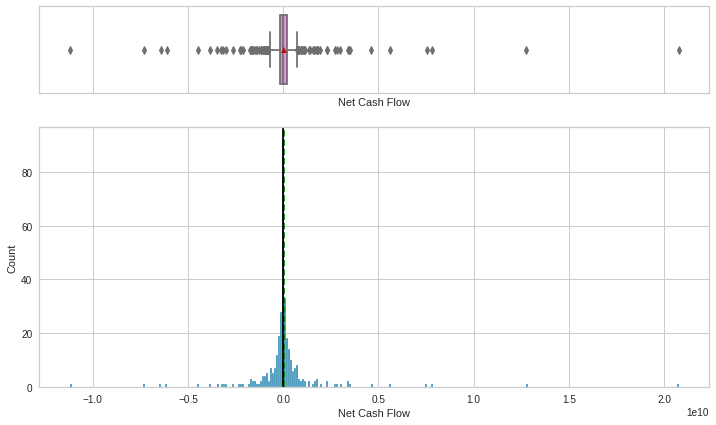

In [ ]:
# histogram_boxplot for Net Cash Flow
histogram_boxplot(df, 'Net Cash Flow')

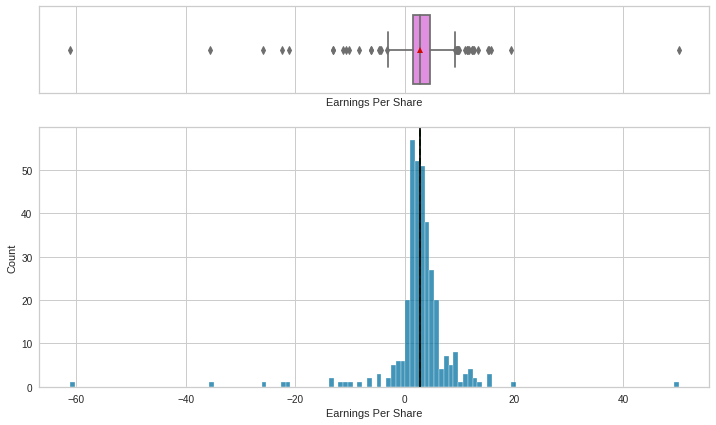

In [ ]:
# histogram_boxplot for Earnings Per Share
histogram_boxplot(df, 'Earnings Per Share')

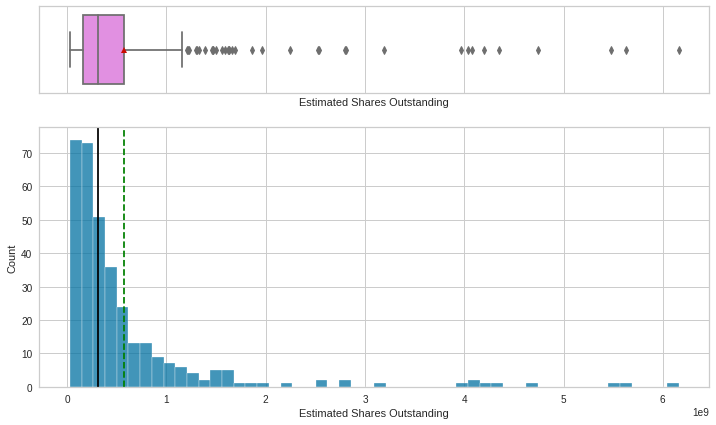

In [ ]:
# histogram_boxplot for Estimated Shares Outstanding
histogram_boxplot(df, 'Estimated Shares Outstanding')

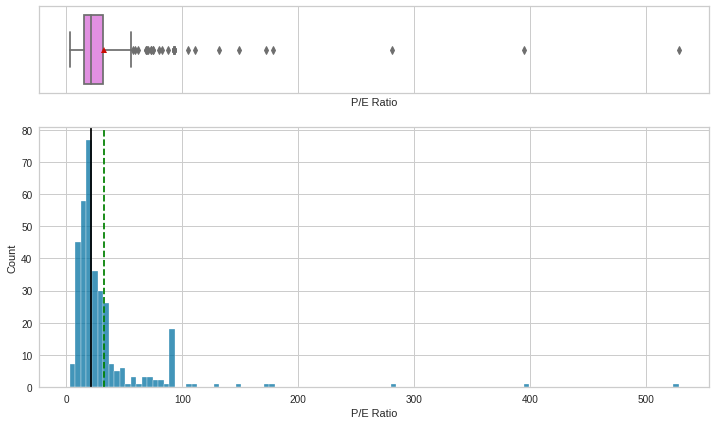

In [ ]:
# histogram_boxplot for P/E Ratio
histogram_boxplot(df, 'P/E Ratio')

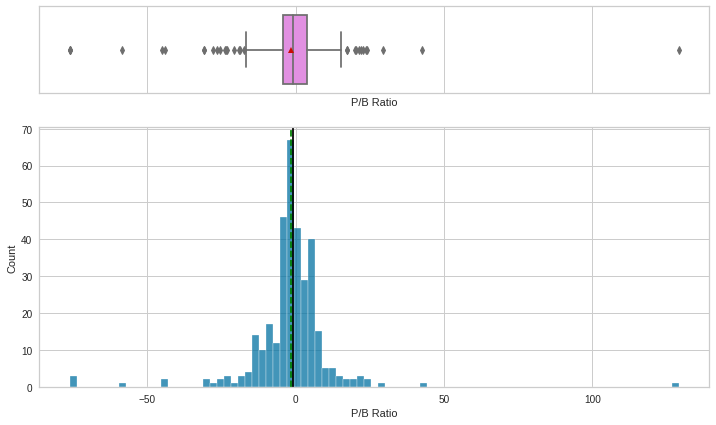

In [ ]:
# histogram_boxplot for P/B Ratio
histogram_boxplot(df, 'P/B Ratio')

In [ ]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

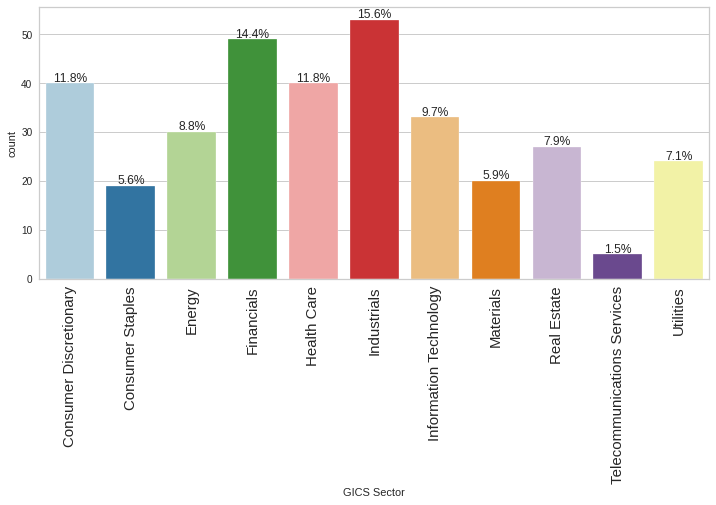

In [ ]:
# Show distribution of GICS Sector
labeled_barplot(df, 'GICS Sector', perc=True)

**Observation: The economic sector with highest number of publically trade companies are industrial with 15.6% followed by financials with 14.4% and health care and consumer descretionary with 11.8%.**

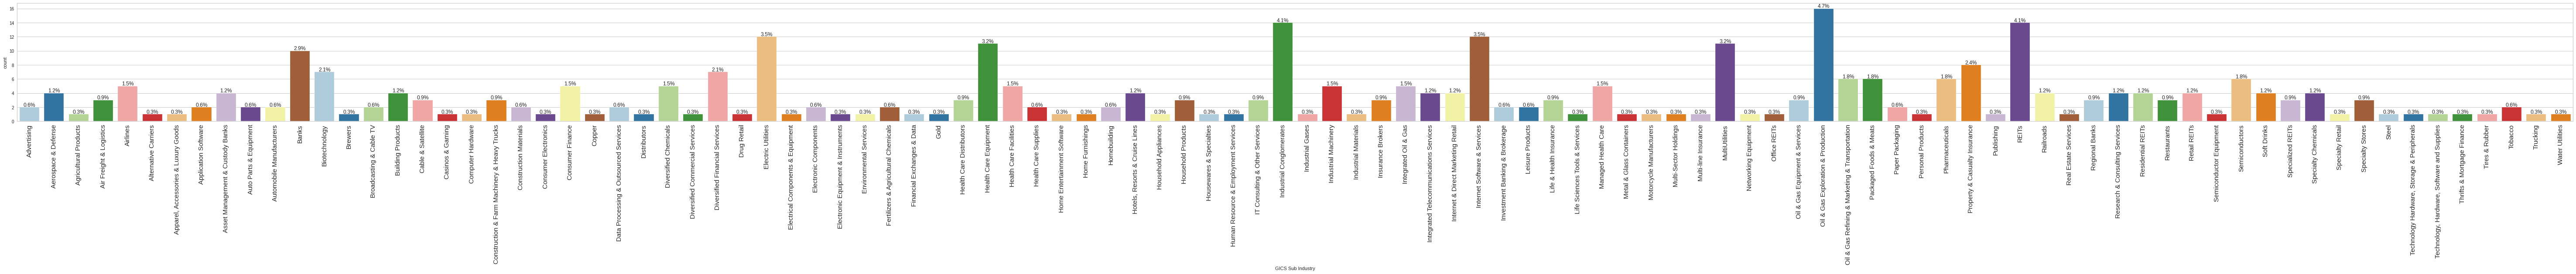

In [ ]:
# Show distribution of GICS Sub Industry
labeled_barplot(df, 'GICS Sub Industry', perc=True)

**Observation: Oil and Gas Exploration and production, Industrial conglomerantes and REITS, of GICS sub-Industry type of business operation contribute mostly to the economy**

### Bivariate Analysis

**2. Which economic sector have seen the maximum price increase on average?**

**Answer: The health care sector has the maximum price increase on average followed by consumer staples**

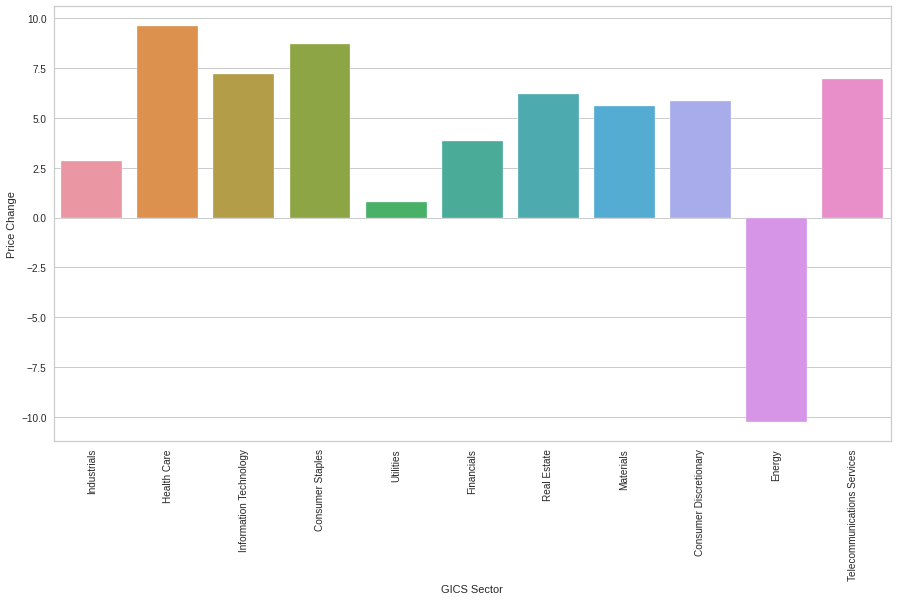

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Price Change', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

**Observations:**

- The health care sector has the highest percentage average positive price change of 10% within the past 13 weeks compared to the rest.  

- The next sector is the consumer staples and the information technology


**3. How are the different variables correlated with each other?**

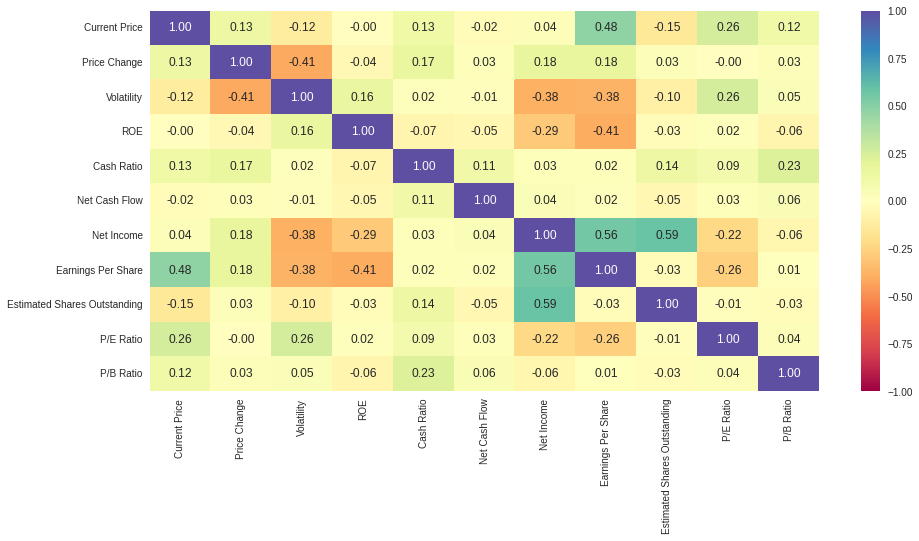

In [ ]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- The estimated shares outstanding and net income are the most postivelity  correlated with each other.
- Other correlated attributes are net income with earnings per share
- P/E Ratio and Price change appears to have a strong negative correlation
- Current Price and ROE are negatively correlated as well.

**4.  Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?**

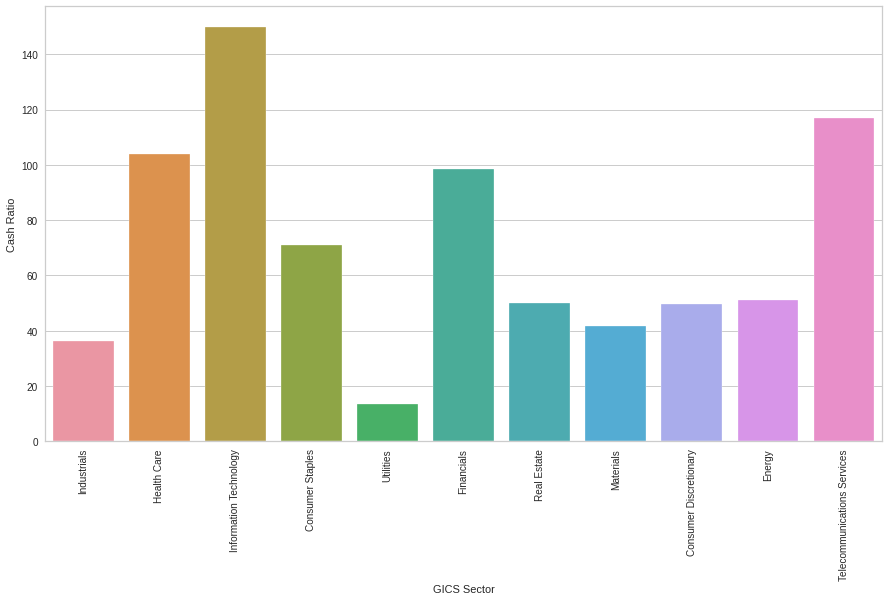

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Cash Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()



- Information Technology sector have higher amount of cash ratio/flow to meet business obligation compared to utilities, materials and industrial.

 P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?**

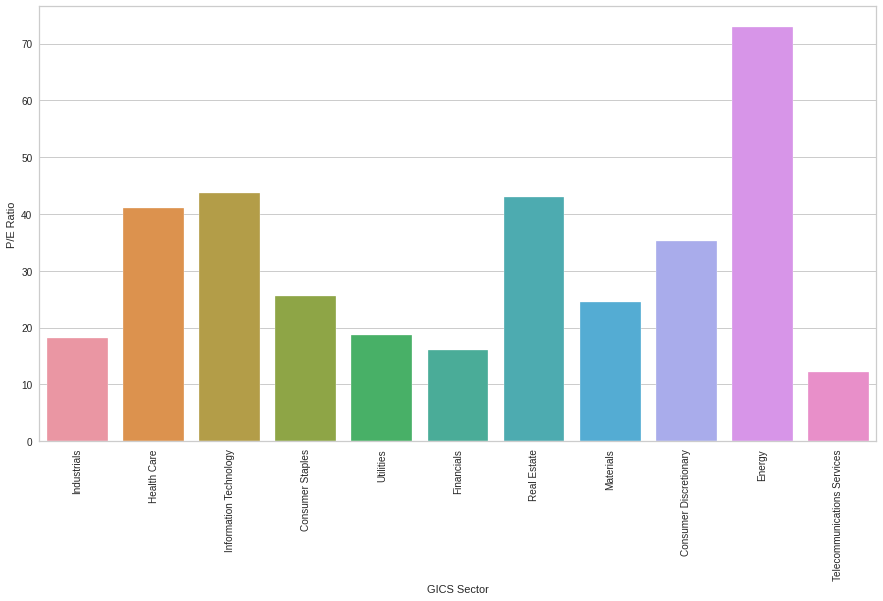

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='P/E Ratio', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()



- Energy sector has the highest amount of P/E ratio, folllowed by information technology, health care and real estate.

- Telecommunication services and financials seems to have the least P/E ratio

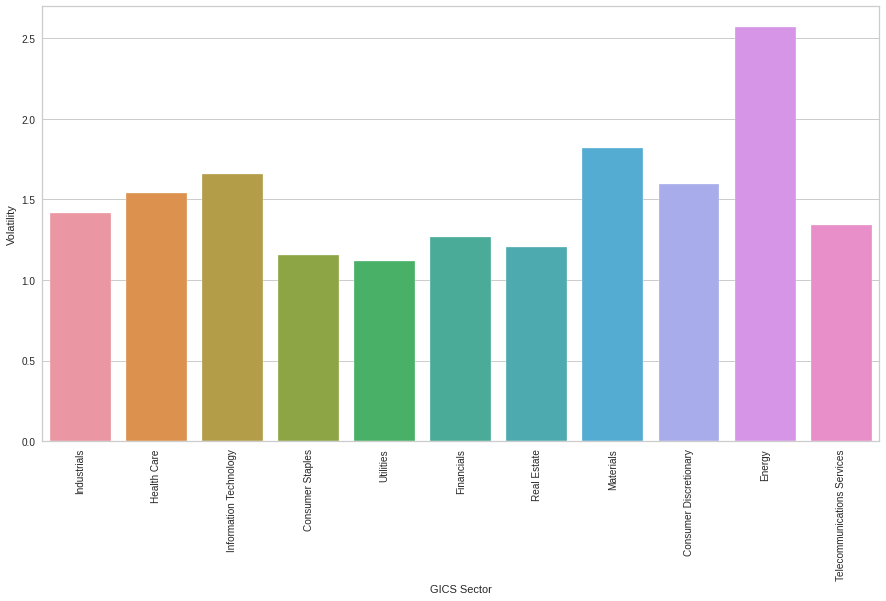

In [ ]:
## # Checking for distribution between Economic Sector and Volatility
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Volatility', ci=False)
plt.xticks(rotation=90)
plt.show()

Observation:

- Over the past 13 weeks energy sector has been more volatile compared to the other sectors with over 25% volatility

## Data Preprocessing



### Checking for Outlier by plotting a box plot of all numerical columns

-

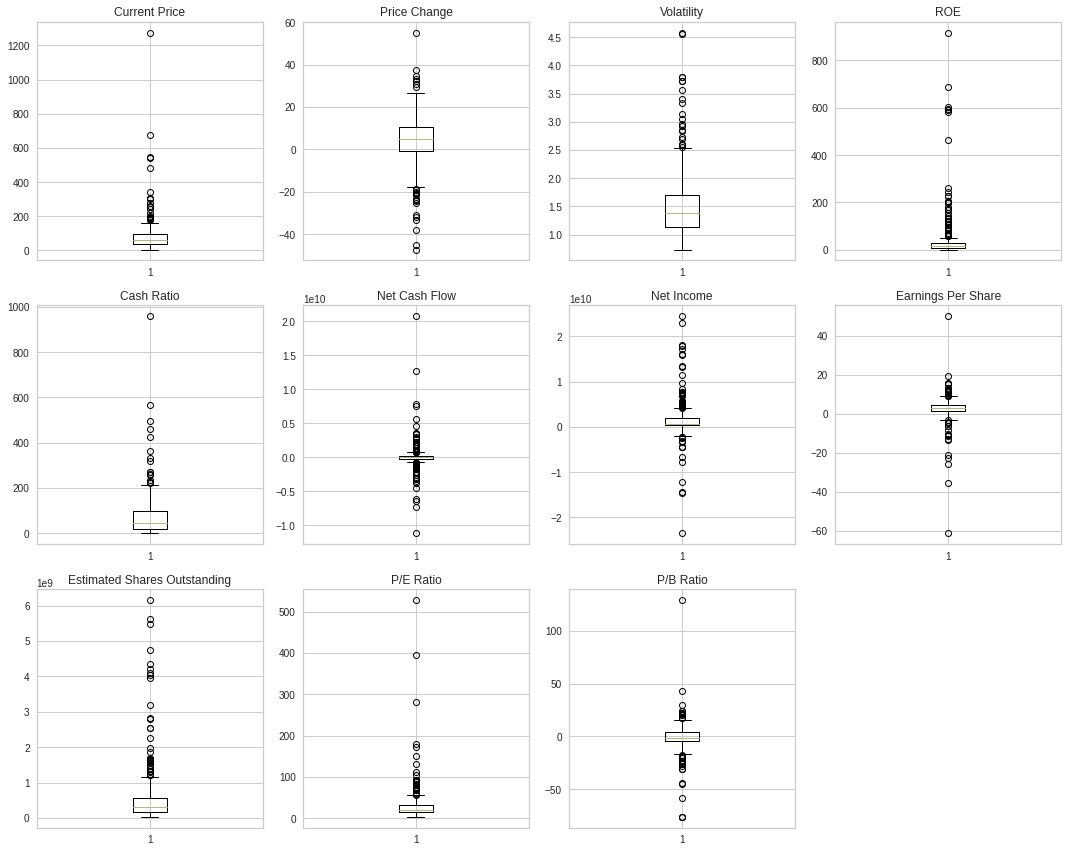

In [ ]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observations:

-  The dataset have some few outliers,  but we will proceed with them as it is.

#### Creating a list of all the numerical columns and assign to a  variable

In [ ]:
num_col = ['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio', 'Net Cash Flow', 'Net Income', 'Earnings Per Share', 'P/E Ratio', 'P/B Ratio', 'Estimated Shares Outstanding' ]

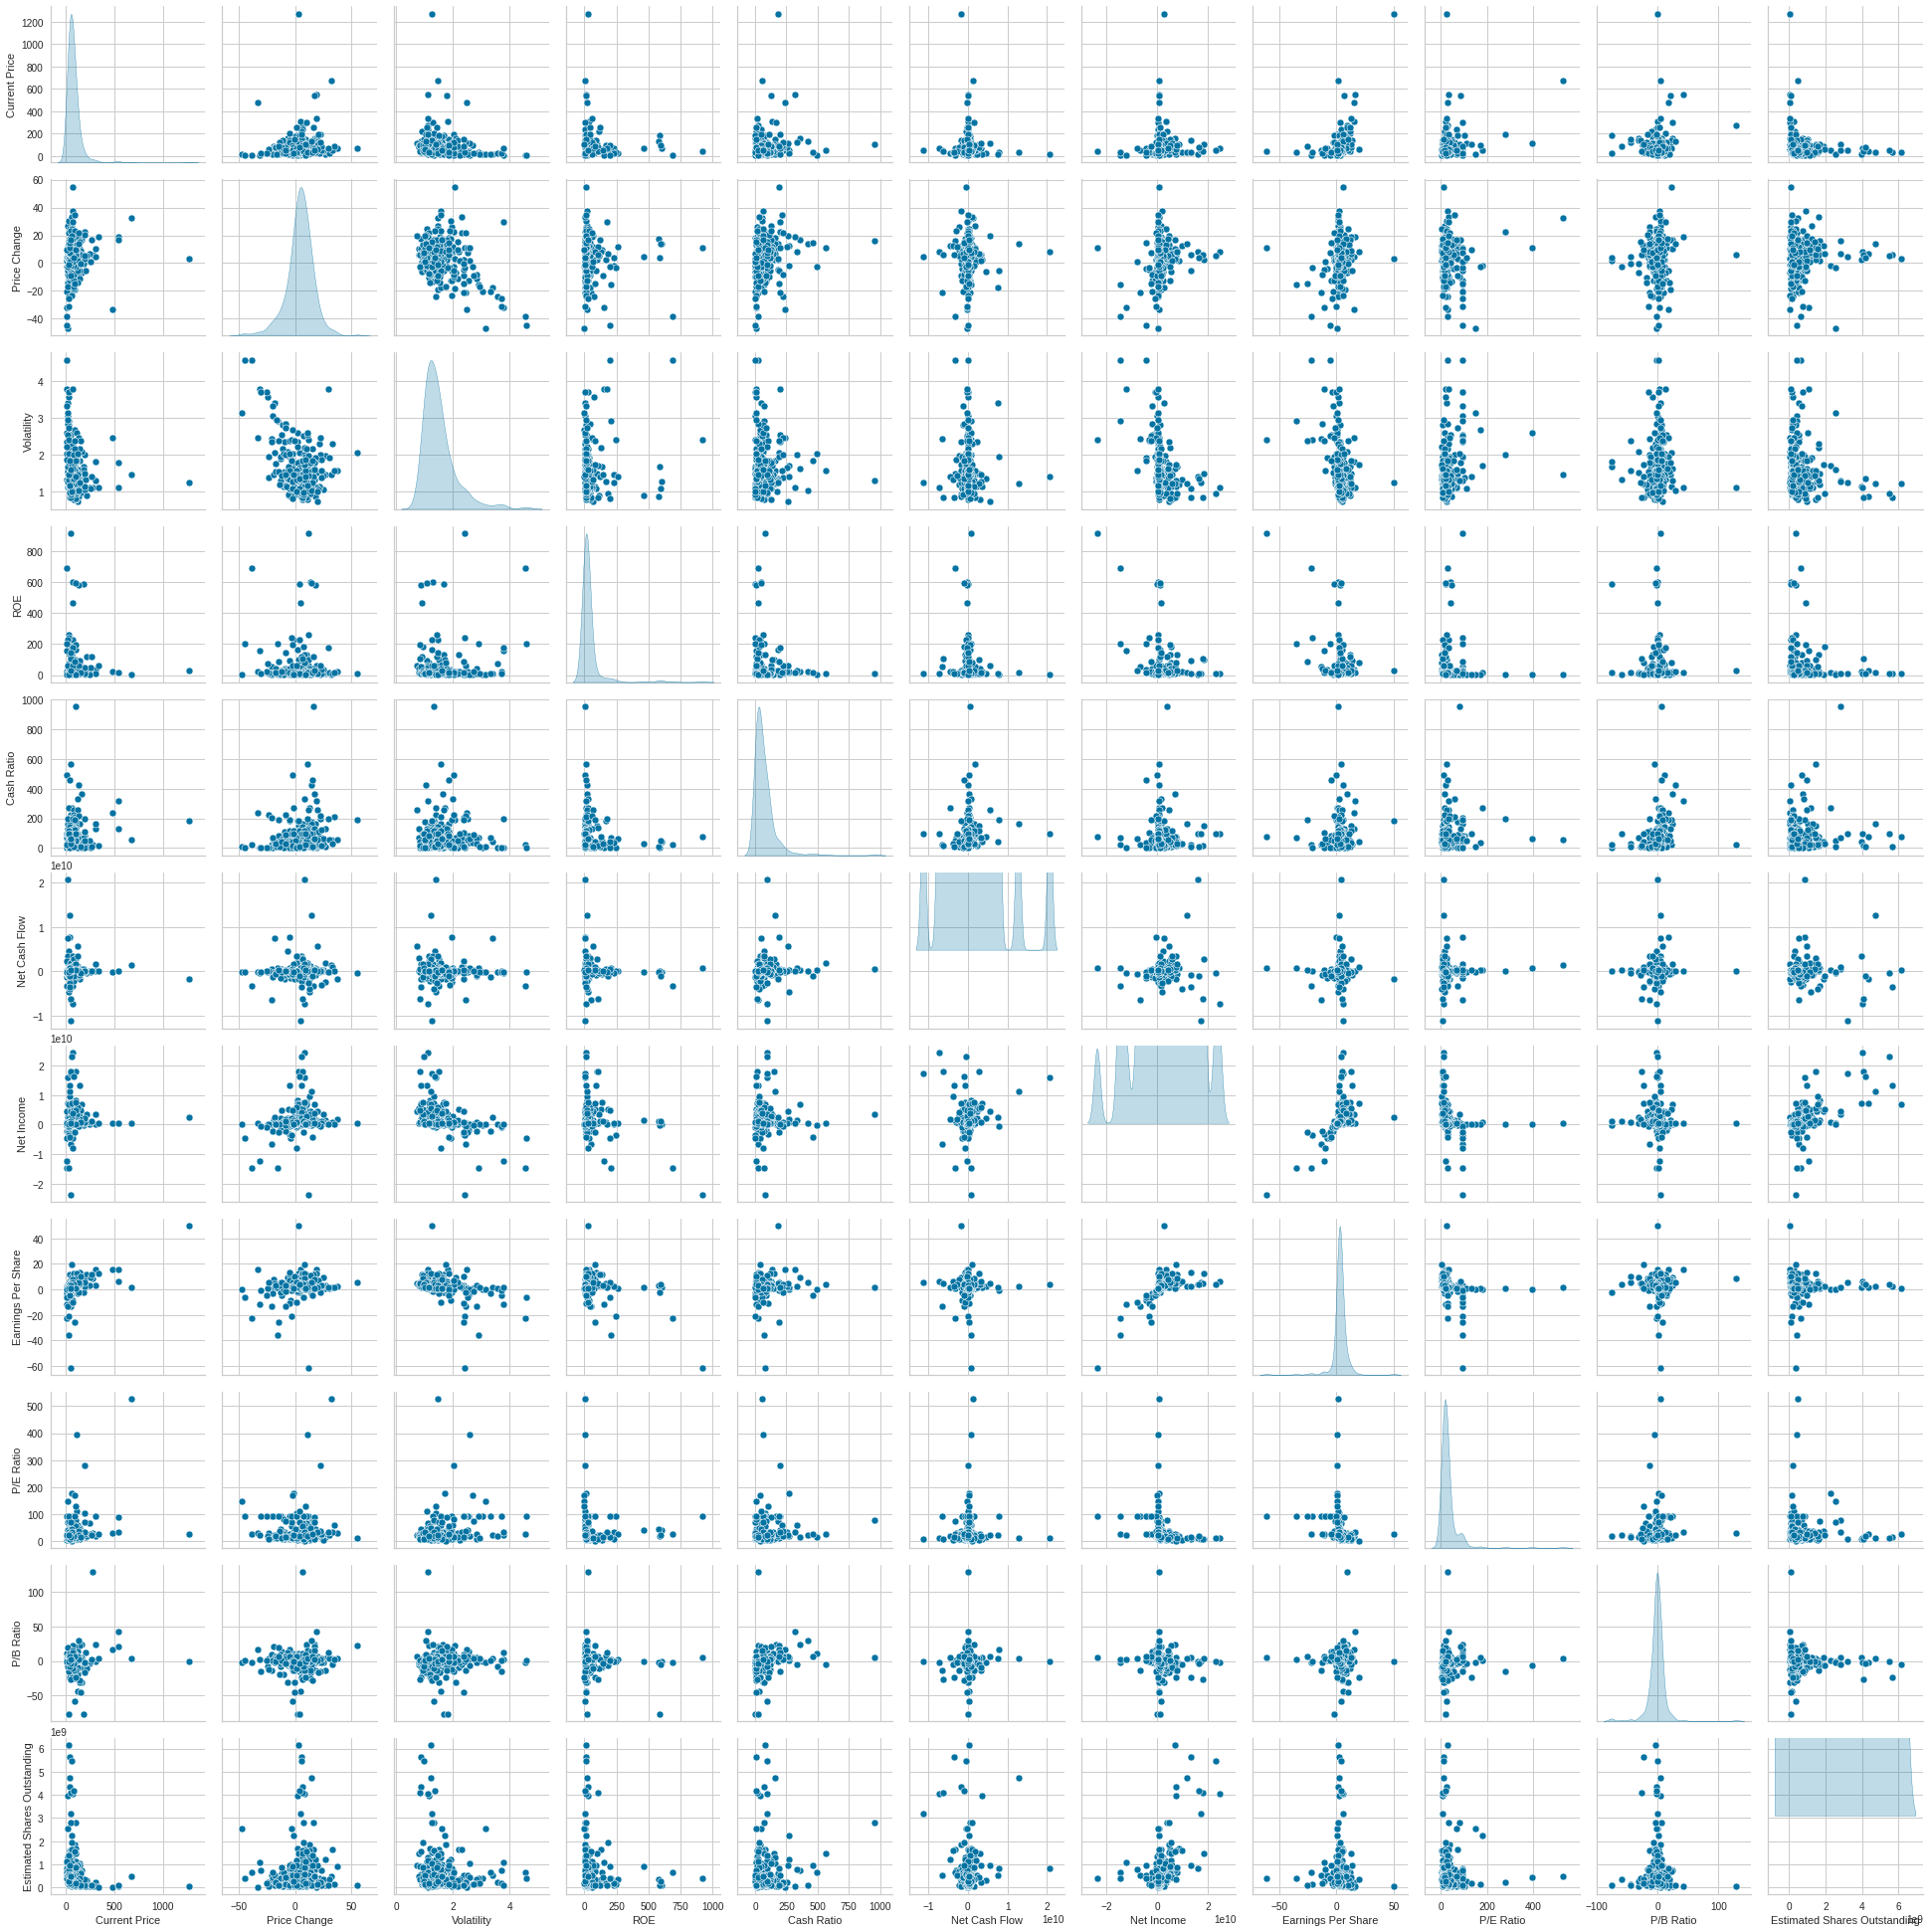

In [ ]:
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()

Observations

- Price change attributes has a bit of normally distribution

- There are poor correlation amongst most of the attributes



### Scaling

Convert all variable measurement to same scale before we proceed with clustering.

In [ ]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [ ]:
# Create dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

#### Viewing the top 5 rows of the scaled data

In [ ]:
# view a sample of the scaled data
subset_scaled_df.sample(n=10, random_state=1)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,P/E Ratio,P/B Ratio,Estimated Shares Outstanding
102,-0.499050,-1.631230,2.365301,1.715701,-0.000261,0.398488,-4.053625,-5.826417,1.365673,0.251239,-0.201806
125,0.243055,1.013134,-0.347539,-0.327752,9.834905,0.276029,0.552725,-0.222962,1.067680,0.545140,2.632871
11,-0.417036,0.291977,-0.613684,-0.255142,-0.255000,-0.017350,-0.316615,-0.191038,-0.141747,0.032189,-0.489464
248,-0.014833,0.549047,-1.218289,-0.234396,0.653202,0.053947,-0.218163,0.076517,-0.192904,-0.038612,-0.101393
238,-0.135351,-0.267995,0.107532,-0.078803,-0.066714,-0.331123,-2.369738,-1.977272,1.365673,0.363059,0.222909
336,-0.289510,-1.065766,-0.079703,1.062211,-0.476513,0.053235,-0.051186,0.029391,-0.337154,-0.152012,-0.167741
112,-0.293454,-2.112992,1.419644,-0.389989,1.450648,0.240939,-0.358182,-0.336977,1.365673,0.809258,-0.503120
147,-0.478214,-0.765718,0.744737,-0.369243,1.317740,3.977596,-0.550379,-0.542204,1.365673,1.366960,0.322445
89,-0.278236,-0.035418,-0.619500,-0.203277,0.320933,1.148681,0.204002,0.359275,-0.500879,0.096248,-0.154085
173,-0.483934,0.249342,0.092841,-0.286260,-0.033488,0.183413,-0.133767,-0.078543,-0.401920,0.425693,-0.176018


Observation:

- Scaled data have smaller range of measurements compared to the original data

## K-means Clustering

### Selecting K with the Elbow Method

In [ ]:
##  Aviod overwritting the scaled data by Copying to another variable for K-means clustering
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.269236715539074
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.028979422017739
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068
Number of Clusters: 10 	Average Distortion: 1.8513913649973124
Number of Clusters: 11 	Average Distortion: 1.8024134734578485
Number of Clusters: 12 	Average Distortion: 1.7900931879652673
Number of Clusters: 13 	Average Distortion: 1.7417609203336912
Number of Clusters: 14 	Average Distortion: 1.673559857259703


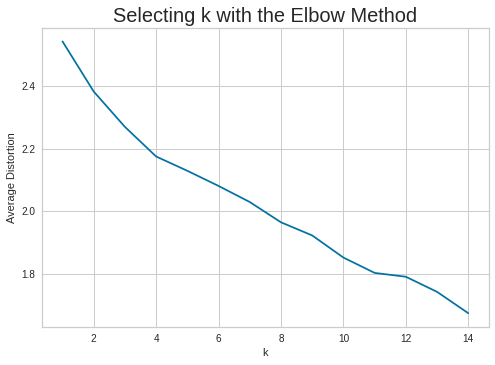

In [ ]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

**The appropriate value of k from the elbow curve seems to be 8 or 11.**

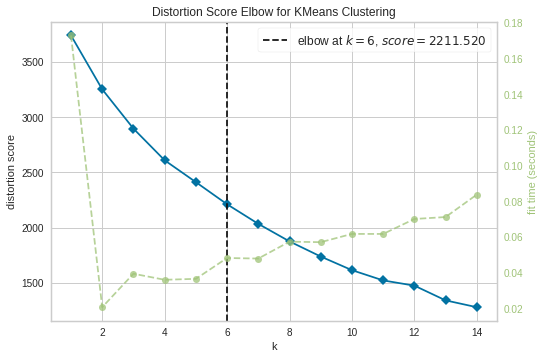

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

Observation:

- Using the elbow visualizer the K value is 6 which does not correspond with the elbow plot chart when analyzed manaully

###  Calculating to check the silhouette scores

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968687)
For n_clusters = 11, the silhouette score is 0.1421832155528444)
For n_clusters = 12, the silhouette score is 0.2044669621527429)
For n_clusters = 13, the silhouette score is 0.23424874810104204)
For n_clusters = 14, the silhouette score is 0.12102526472829901)


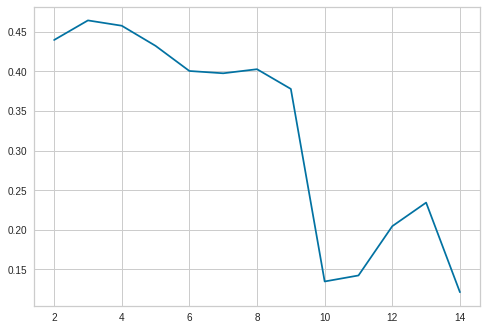

In [ ]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

**From the silhouette scores of 0.402, it seems that 8 is a good value of k.**

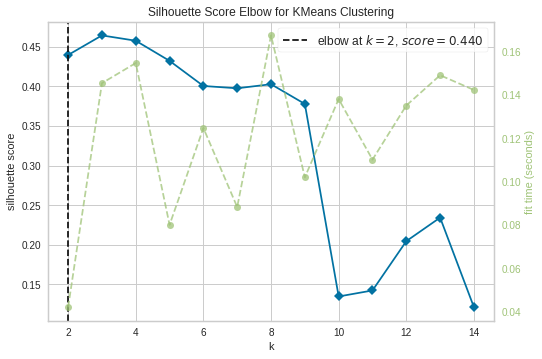

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

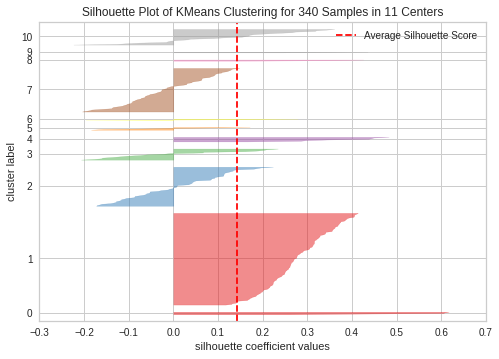

In [ ]:
## finding optimal no. of clusters with silhouette coefficients score of 11
visualizer = SilhouetteVisualizer(KMeans(11, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

Observation:

- With K=11, there are negative silhouette scores with diluted results.
- The number of rows in each clusters are not distributed evenly which might lead us to conclude K=11 is not appropriate for clustering

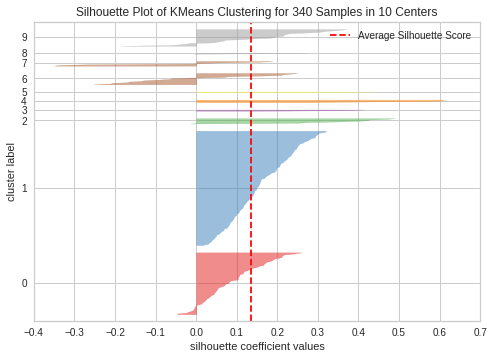

In [ ]:
## finding optimal no. of clusters with silhouette coefficients score 0f 10
visualizer = SilhouetteVisualizer(KMeans(10, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

Observation:

- With K=10, Very few negative silhouette scores, however it seems the rows are evenly distributed except for cluster 0 and 1



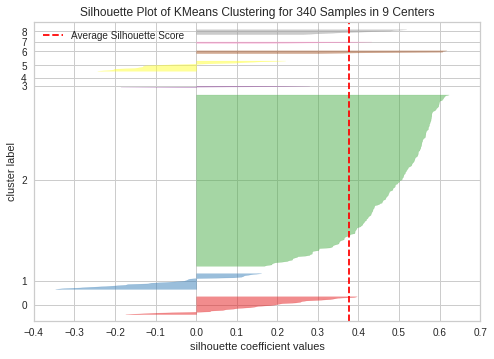

In [ ]:
## finding optimal no. of clusters with silhouette coefficients score of 9
visualizer = SilhouetteVisualizer(KMeans(9, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

Observation:

- With K=10, There are some negative silhouette scores present, The rows are not evenly distributed hence it will not be ideal for clustering



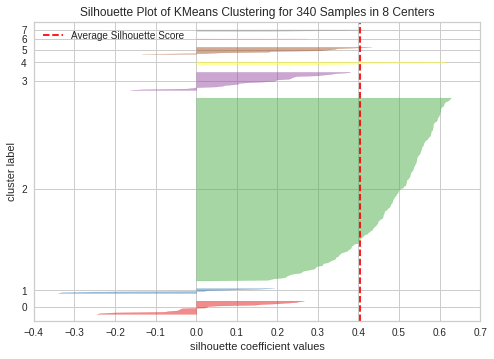

In [ ]:
## finding optimal no. of clusters with silhouette coefficients score of 8
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

Observation:

- With K=8, Some negative silhouette scores, With evenly distributed rows on most of the clusters except for cluster 2



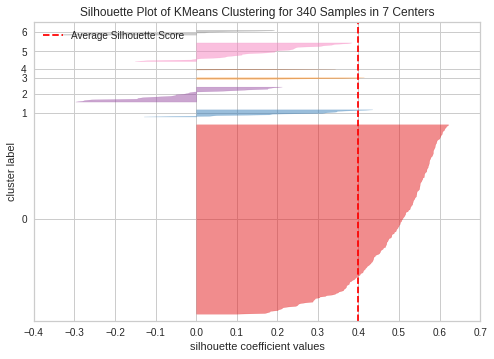

In [ ]:
## finding optimal no. of clusters with silhouette coefficients score of 7
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

Observation:

- With K=7, The distribution is slight distributed except for cluster 0



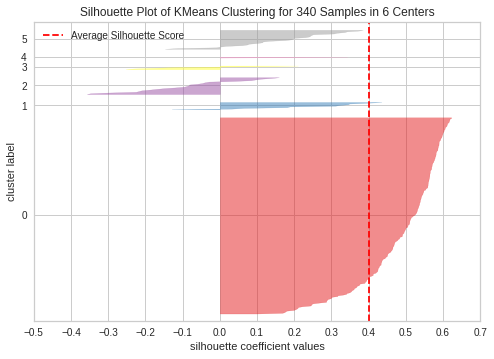

In [ ]:
## finding optimal no. of clusters with silhouette coefficients score of 6
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

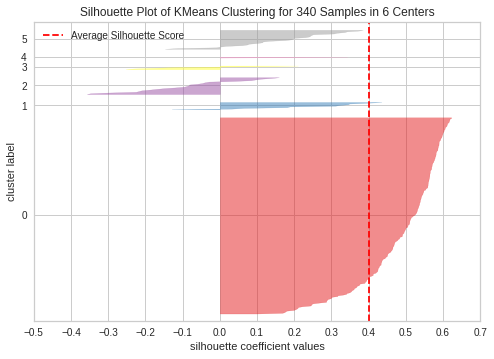

In [ ]:
## finding optimal no. of clusters with silhouette coefficients score of 6
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

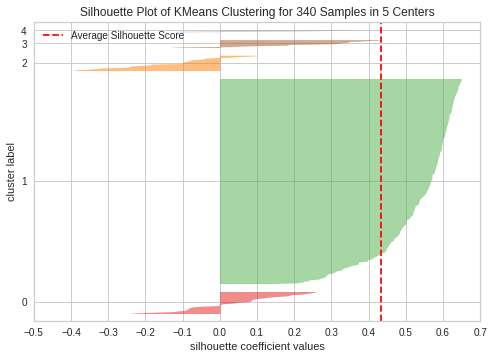

In [ ]:
## finding optimal no. of clusters with silhouette coefficients score of 5
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

Observation:

- With K=5,  There are negative silhouette scores, with poorly distribution rows within the clusters, with clusters 1 having the highest number of row.



### Selecting final model

**Let's take 8 as the appropriate no. of clusters as the silhouette score is reasonably high enough and there is knick at 8 in the elbow curve.**

In [ ]:
# final K-means model using K = 8
kmeans = KMeans(n_clusters=8, random_state=1)
kmeans.fit(k_means_df)

KMeans(random_state=1)

In [ ]:
# creating a copy of the original data
orig_df1 = df.copy()

In [ ]:
# adding kmeans cluster labels to the scaled and original dataframes
k_means_df["KM_segments"] = kmeans.labels_
orig_df1["KM_segments"] = kmeans.labels_

### Cluster Profiling

In [ ]:
## code to groupby the cluster labels
km_cluster_profile = orig_df1.groupby("KM_segments").mean()

In [ ]:
# Code to Groupby the cluster labels
km_cluster_profile["count_in_each_segment"] = (
    orig_df1.groupby("KM_segments")["Security"].count().values
)

In [ ]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,80.152167,14.571437,1.829679,28.100000,321.850000,625929050.000000,942050500.000000,2.010500,790456335.265000,45.067457,8.307945,20
1,508.534992,5.732177,1.504640,27.250000,150.875000,37895875.000000,1116994125.000000,15.965000,75654420.935000,43.727459,29.581664,8
2,71.100057,4.970680,1.372796,24.988636,51.087121,87930727.272727,1579775988.636364,3.688466,435677482.318371,23.232454,-3.350613,264
3,34.231808,-15.515565,2.832069,48.037037,47.740741,-128651518.518519,-2444318518.518518,-6.284444,503031539.057037,75.627265,1.655990,27
4,108.304002,10.737770,1.165694,566.200000,26.600000,-278760000.000000,687180000.000000,1.548000,349607057.720000,34.898915,-16.851358,5
5,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
6,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
7,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,3


In [ ]:
## Printing the companies in each cluster
for cl in orig_df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(orig_df1[orig_df1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 2, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Archer-Daniels-Midland Co' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Amphenol Corp' 'Activision Blizzard' 'AvalonBay Communities, Inc.'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Limited' 'CBRE Group'
 'Crown Castle International Corp.' 'Carnival 

In [ ]:
orig_df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary          3
             Consumer Staples                1
             Energy                          1
             Health Care                     5
             Information Technology          8
             Materials                       1
             Telecommunications Services     1
1            Consumer Discretionary          2
             Health Care                     4
             Information Technology          1
             Real Estate                     1
2            Consumer Discretionary         32
             Consumer Staples               15
             Energy                          5
             Financials                     45
             Health Care                    28
             Industrials                    50
             Information Technology         20
             Materials                      17
             Real Estate                    26
             Teleco

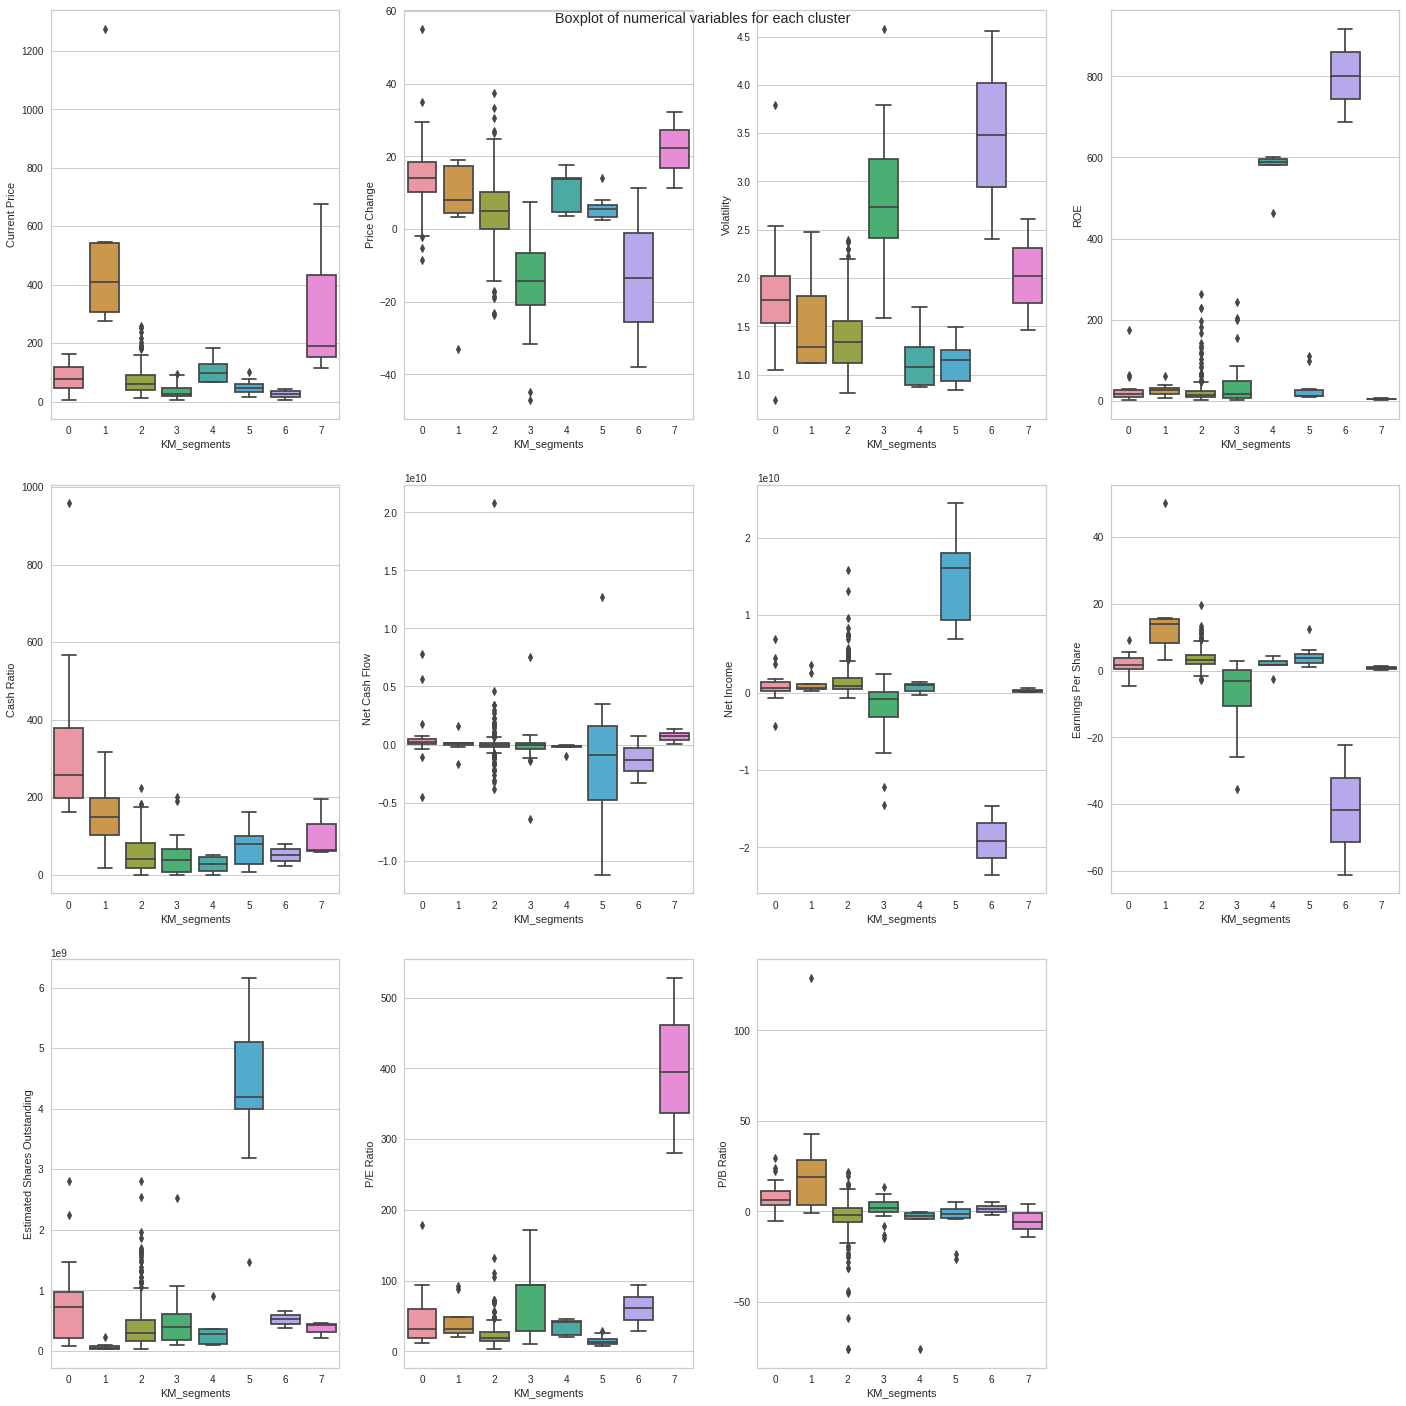

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=orig_df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

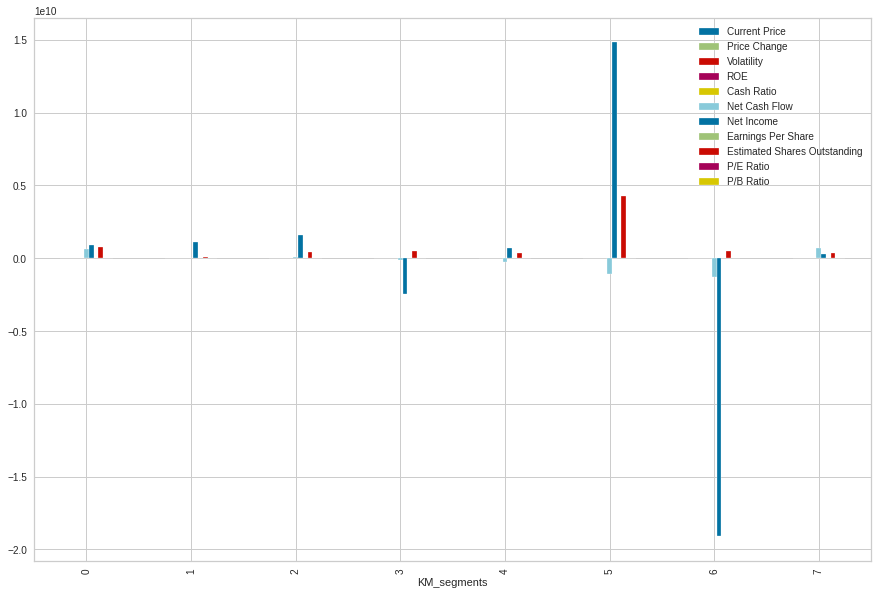

In [ ]:
orig_df1.groupby("KM_segments").mean().plot.bar(figsize=(15, 10))

### Insights

- **Cluster 0**:
    - Current stock price value are moderately on the low .
    - The Price change are relatively high above 10% for stocks in that clusters.
    - Volatility of stocks in that cluster is moderate on average 15%.
    - ROE is significantly low for stocks in this cluster.
    - Net Income is almost flat for stocks in the clusters
    - The cash ratio of stocks in this cluster is very high which means they have room for growth
    - P/E ratio is relatively low for most of the stocks


- **Cluster 1**:
    - Current stock price value is very high for stocks in this cluster
    - The Price change remains positive with an average of 10%
    - Volatility of stocks in that cluster is moderate between 5 -10%
    - ROE is significantly low for stocks in this cluster.
    - Net Income is relatively flat for stocks in the clusters
    - The cash ratio of stocks in this cluster is moderate to high
    - P/E ratio is relatively low for most of the stocks


- **Cluster 2**:
    - Current stock price value on the average is low.
    - The Price change remains positive with an average of 10%
    - Volatility of stocks in this cluster is moderate between 5 -10%
    - ROE is significantly low for stocks in this cluster.
    - Net Income is relatively flat for stocks in the clusters
    - The cash ratio of stocks in this cluster is moderate to high
    - P/E ratio is relatively low for most of the stocks


- **Cluster 3**:
    - Current stock price value on the average is low.
    - The average price change is moderate to low in the cluster average of 5%
    - Volatility of stocks in this cluster is moderate to low
    - ROE is significantly low for stocks in this cluster with few outliers.
    - Net Income is relatively flat for stocks in the clusters
    - The cash ratio of stocks in this cluster is comparably low as well  
    - P/E ratio is moderately high compared to other clusters


- **Cluster 4**:
    - Current stock price value for this cluster is moderate to low
    - The Price change has a negative change with an average of -10%
    - Volatility of stocks in that cluster is moderate between 5 -10%
    - ROE is very high for stocks in this cluster comapared to other clusters
    - Net Income is considerably flat for stocks in the clusters
    - The cash ratio of stocks in this cluster is relatively low
    - P/E ratio is moderate to low


- **Cluster 5**:
    - Current stock price value for this cluster is moderate low as the other clusters
    - The Price change within the past 13 weeks is relatively low
    - Volatility of stocks in that cluster is moderate to low
    - ROE is very low with few outliers
    - Net Income is significantly higher in this cluster
    - The cash ratio of stocks in this cluster is moderate to low compared to  the other clusters
    - P/E ratio is very low


- **Cluster 6**:
    - Current stock price value for this cluster is very low
    - The Price change is moderately
    - Volatility of stocks is moderate to very low
    - ROE is very low with few outliers
    - Net Income is very moderately high
    - The cash ratio of stocks in this cluster is moderate to high
    - P/E ratio is significantly low


- **Cluster 7**:
    - Current stock price value in this cluster is very low
    - The percentage Price change is very high in 13 weeks from low to high
    - Volatility of stocks in cluster is significantly high with 35% variation
    - ROE is very high for stocks in this cluster which is attractive
    - Net Income is very low this might cause decline in growth
    - The cash ratio of stocks in this cluster is moderate to low
    - P/E ratio is moderate to average.


- **Cluster 8**:
    - Current stock price value for this cluster is moderate to high
    - Percentage price change is moderate to high with an average of 20% over 13 weeks
    - Volatility of stocks in that cluster is moderate to high
    - ROE is very poor and low
    - Net Income is considerably flat for stocks in the clusters
    - The cash ratio of stocks in this cluster is moderate to low
    - P/E ratio is significantly high

## Hierarchical Clustering

### Computing Cophenetic Correlation

In [ ]:
hc_df = subset_scaled_df.copy()

In [ ]:
## listing the distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

## add the linkage methods to the list
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524591.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.792530720285.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correlatio

Observation:

- Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.

**Checking different linkage methods with Euclidean distance only.**

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"] ## Complete the code to add linkages

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


**Observation:**

**We can say that cophenetic correlation is maximum with Euclidean distance and average linkage.**

### Checking Dendrograms

**Let's see the dendrograms for the different linkage methods.**

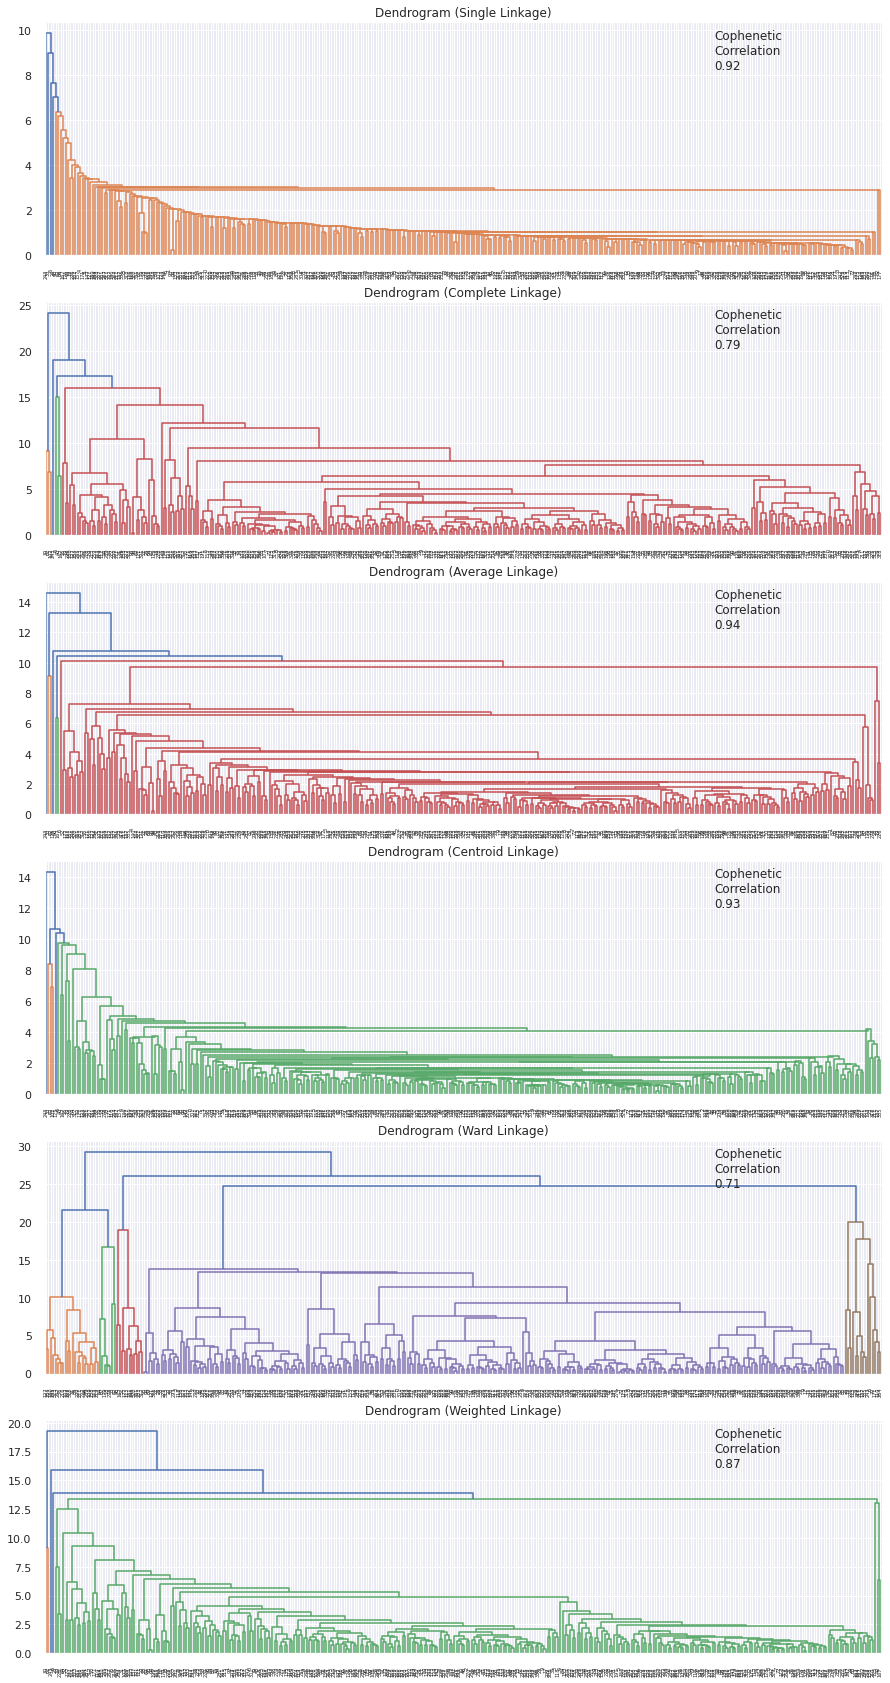

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"] ## Complete the code to add linkages

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# Enumerate through the list of linkage methods above
# For each linkage method, plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

**Observations**

- The cophenetic correlation is highest for average and centroid linkage methods.
- I will proceed with the average linkage.
- 9 appears to be the appropriate number of clusters from the dendrogram for centroid linkage.

In [ ]:
# created a dataframe for comparing cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.710118
1,complete,0.787328
5,weighted,0.869378
0,single,0.923227
3,centroid,0.931401
2,average,0.942254


### Creating model using sklearn

In [ ]:
## defining the hierarchical clustering model
HCmodel = AgglomerativeClustering(n_clusters=9, affinity="euclidean", linkage="average")
HCmodel.fit(hc_df)

AgglomerativeClustering(linkage='average', n_clusters=9)

In [ ]:
# creating a copy of the original data
orig_df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
orig_df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [ ]:
## code to groupby the cluster labels
hc_cluster_profile = orig_df2.groupby("HC_segments").mean()

In [ ]:
hc_cluster_profile["count_in_each_segment"] = (
    orig_df2.groupby("HC_segments")["Security"].count().values
)

In [ ]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,75.017416,3.937751,1.513415,35.621212,66.545455,-39846757.575758,1549443100.000000,2.904682,562266326.402576,29.091275,-2.146308,330
1,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,2
2,152.564999,16.742017,2.314435,4.000000,130.000000,380861000.000000,133320500.000000,0.485000,317332352.950000,337.464244,-9.935778,2
3,104.660004,16.224320,1.320606,8.000000,958.000000,592000000.000000,3669000000.000000,1.310000,2800763359.000000,79.893133,5.884467,1
4,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1
5,276.570007,6.189286,1.116976,30.000000,25.000000,90885000.000000,596541000.000000,8.910000,66951851.850000,31.040405,129.064585,1
6,4.500000,-38.101788,4.559815,687.000000,22.000000,-3283000000.000000,-14685000000.000000,-22.430000,654703522.100000,28.407929,-1.840528,1
7,44.470001,11.397804,2.405408,917.000000,80.000000,698000000.000000,-23528000000.000000,-61.200000,384444444.400000,93.089287,4.970809,1
8,675.890015,32.268105,1.460386,4.000000,58.000000,1333000000.000000,596000000.000000,1.280000,465625000.000000,528.039074,3.904430,1


In [ ]:
## Printing companies in each cluster
for cl in orig_df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(orig_df2[orig_df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'AutoNation Inc' 'Anthem Inc.' 'Aon plc' 'Anadarko Petroleum Corp'
 'Amphenol Corp' 'Arconic Inc' 'Activision Blizzard'
 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'Baker Hughes Inc' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball Corp' 'Bristol-Myers Squibb' 'Boston Scient

**We will just focus on 3 clusters for the insight( 0, 1 and 2) since the rest have just 1 or 2 company stocks in the cluster.  This clustering does not look good as the clusters do not have enough variability.**

**Let us try using Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 6 appears to be the appropriate number of clusters from the dendrogram for Ward linkage.**

In [ ]:
orig_df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary         38
             Consumer Staples               19
             Energy                         28
             Financials                     48
             Health Care                    39
             Industrials                    53
             Information Technology         29
             Materials                      20
             Real Estate                    27
             Telecommunications Services     5
             Utilities                      24
1            Financials                      1
             Information Technology          1
2            Health Care                     1
             Information Technology          1
3            Information Technology          1
4            Consumer Discretionary          1
5            Information Technology          1
6            Energy                          1
7            Energy                          1
8            Consum

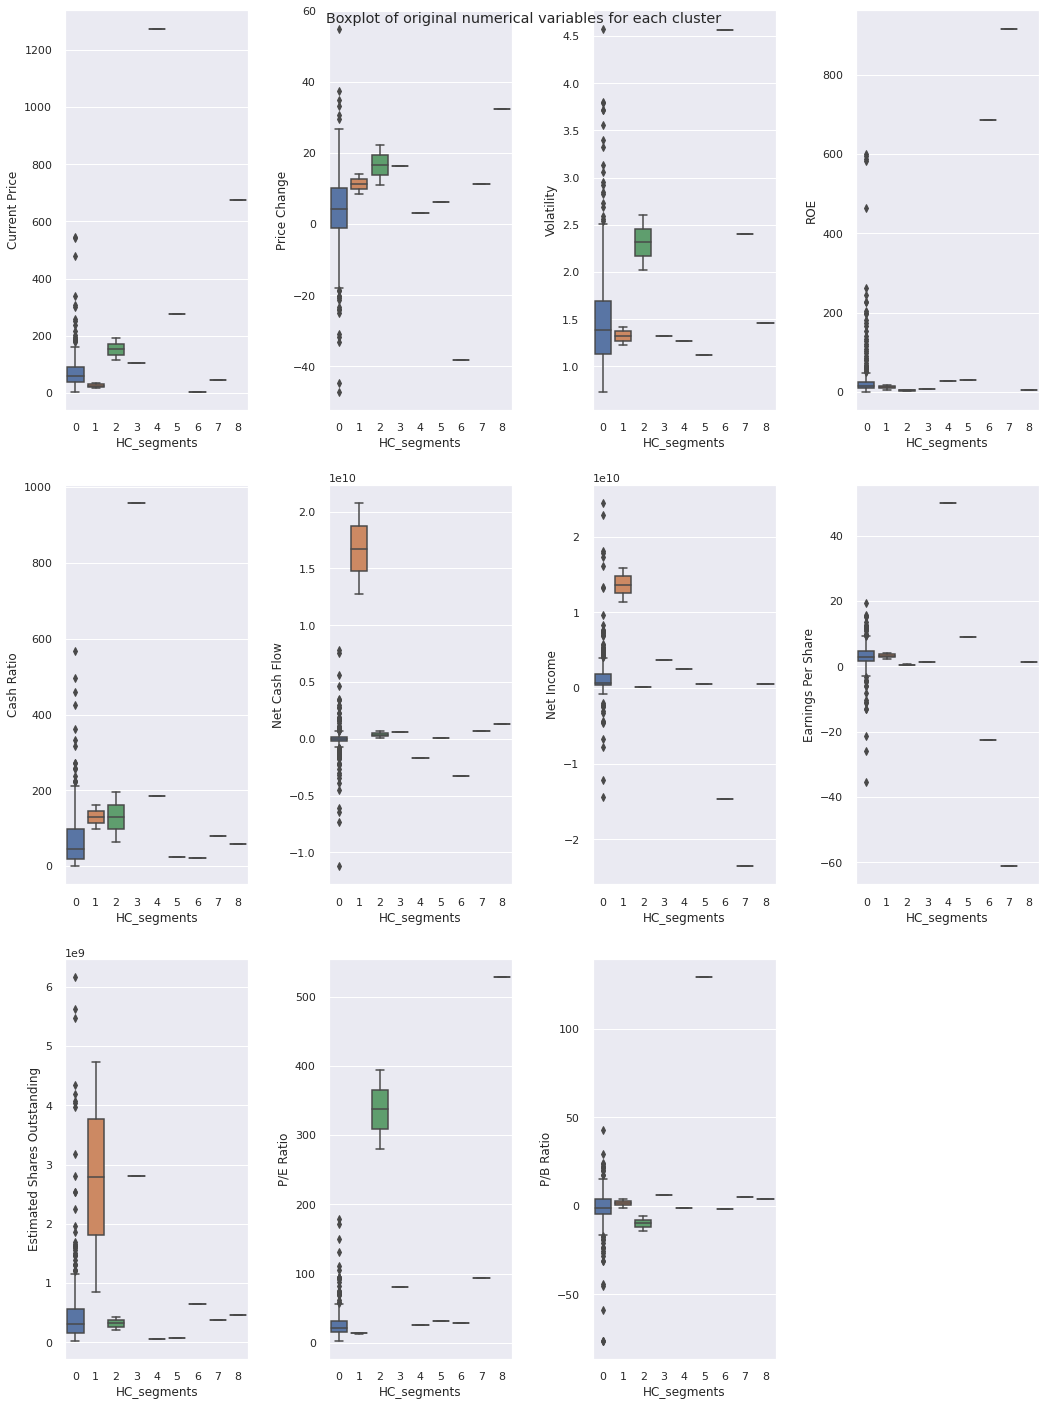

In [ ]:
plt.figure(figsize=(15, 20))
plt.suptitle("Boxplot of original numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=orig_df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

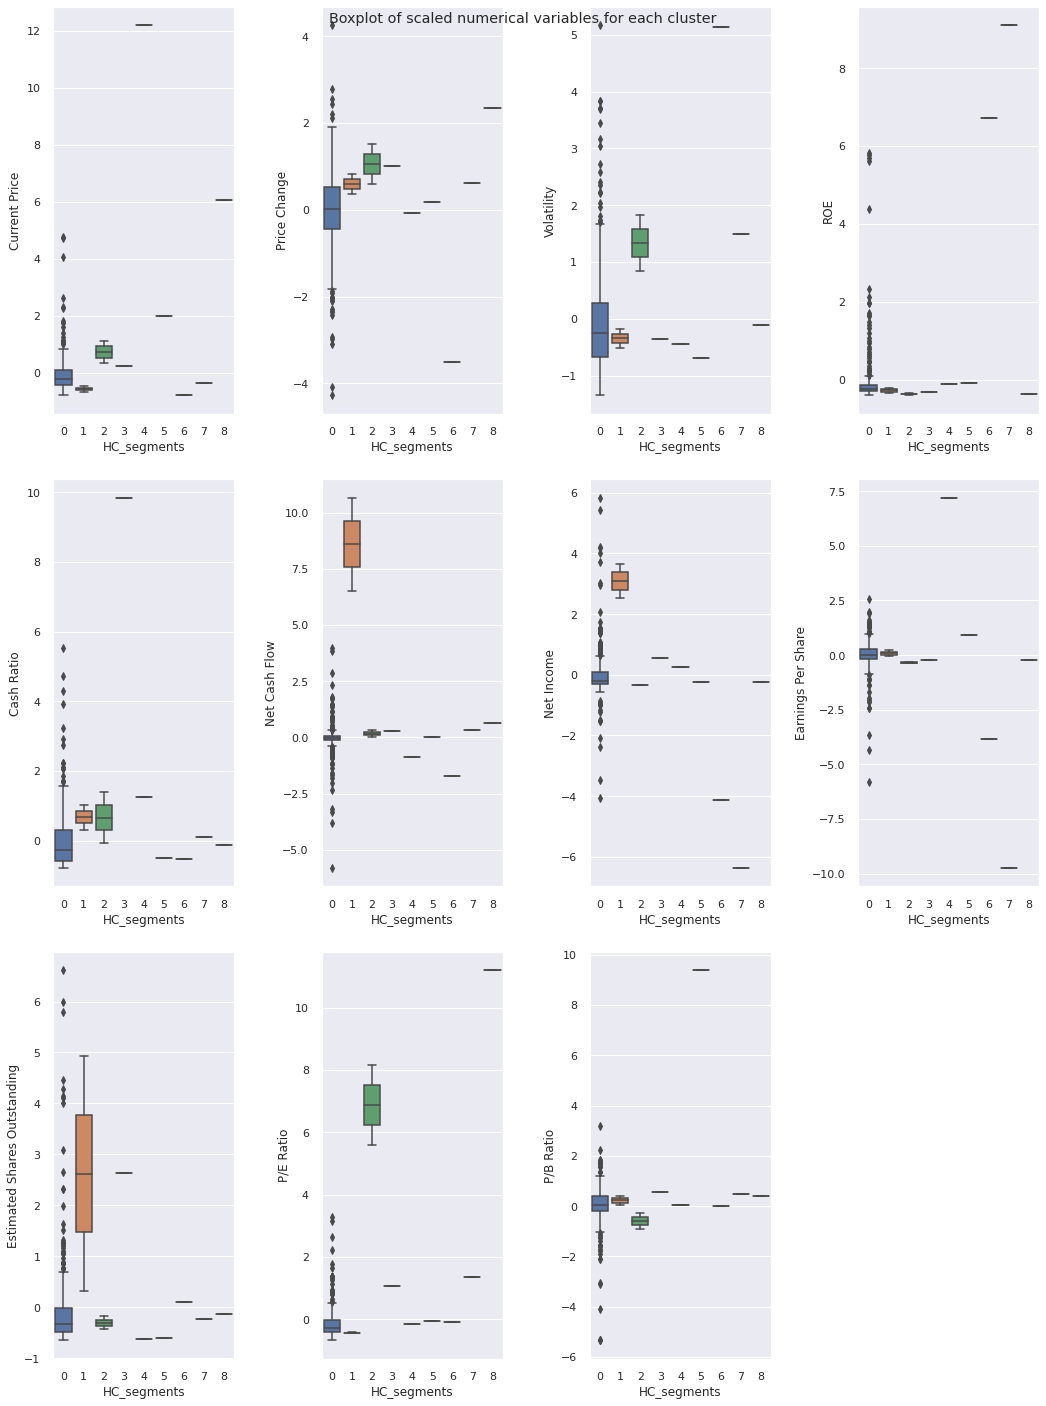

In [ ]:
plt.figure(figsize=(15, 20))
plt.suptitle("Boxplot of scaled numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=hc_df, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

### Insight

- **Cluster 0**:
    - Current stock price value are moderately low with some outliers in the cluster.
    - The Price change are relatively minimal for this clusters in 13 weeks.
    - Volatility of stocks is considerably moderate on the negative direction
    - ROE is significantly low for stocks in this cluster.
    - Net Income is flat for stocks in the clusters with outliers
    - The cash ratio of stocks in this cluster is relatively low
    - P/E ratio is low with some outliers


- **Cluster 1**:
    - Current stock price value is very low which can mean good entry point
    - The Price change is low to moderate compared to the other clusters
    - Volatility of stocks in that cluster is considerably low
    - ROE is significantly low for stocks in this cluster.
    - Net Income is very high for stocks in this cluster
    - The cash ratio of stocks in this cluster is moderate to high
    - P/E ratio is very low for most of the stocks


- **Cluster 2**:
    - Current stock price is moderate
    - The Price change compared to other cluster is relatively high
    - Volatility of stocks in this cluster is high
    - ROE is significantly low for stocks in this cluster.
    - Net Income is relatively flat to low for stocks in the clusters
    - The cash ratio of stocks in this cluster is moderate to high in comparison
    - P/E ratio is significantly high for company stocks in this clusters as this can drive growth


- **Cluster 3**:
    - Current stock price is low to moderate
    - The percentage price change is moderate to high in the cluster
    - Volatility of stocks in this cluster is low  
    - ROE is significantly low for stocks in this cluster with few outliers.
    - Net Income is moderate to flat for stocks in the clusters
    - The cash ratio of stocks in this cluster is extremely high
    - P/E ratio is low to  moderately compared to other clusters







## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

###**Comparison between K-means and Hierarchical Technique**

- The K-means and Hierarchical clustering technique showed considerably similar computation time while executing. This might be due to the size of the dataset used
- Both K-means and Hierarchical showed less distinct clusters, It was difficult to obtain evenly distributed observations in each clusters. Hence deciding on best clusters was not easy.
- There are no clusters with similar observations from both algorithms
- On the K-means technique it's possible there could be 2 to 3 clusters identified by looking at the elbow plot, however for Hierarchical, only one was identified.  
- In the cluster Profiling for the K-means the number of company in each clusters were not evenly distributed, however, it was better that Hierarchical clustering.   There were more sparse observations in most of the clusters in Hierarchical compared to K-means clustering.
- Sector's with higher average current price were in cluster 4 of the Hierarchical technique while higher current price were in cluster 2 of K-means
- About 14 Sectors combined with higher net cash flow and net income were found to be in cluster 1 for the Hierachical techniques compared to K-means in clusters 7 and 5 respectively with 2 sectors.
- 2 sectors in clusters 6 had significantly high ROE in K-means clustering compared to Hierarchical with 1 sector in cluster 7.




## Actionable Insights and Recommendations

-

- Since ROE is a gauge of a corporation's profitability and how efficiently it generates those profits, the higher the ROE, the better a company is at converting its equity financing into profits.
- Cluster 0 companies are the ones who performed poorly in the previous quarter. Most of the companies in this cluster are from the Energy sector, which as a whole performed poorly in the previous quarter. Investors will have to be careful and dig deeper into the financial statements of these companies for a better analysis.
- Cluster 1 companies have highly-priced stocks and have shown the most growth in the previous quarter. Large proportions of stocks in this cluster are from Healthcare and IT sectors. The high earnings per share also indicate that these stocks will justify their high price tag with good returns. The high P/E ratio indicates that these stocks are either overvalued or investors expect good growth potential from these companies.
- Cluster 2 companies are the ones which have a low price and have had a great previous quarter. They are less riskier investments and are traded in large volumes. The low P/E ratio might also indicate that these stocks are undervalued, but we will have to dig deeper to conclude the same with confidence.
- Cluster 3 company stocks are moderately priced and are less volatile. They had a good previous quarter and their stocks are traded in moderate volumes. The moderate earnings per share also indicate that these stocks will yield good returns.
- Trade&Ahead should look into more financial (fundamental and technical) indicators to make better predictions of stock price movements and assessment of company valuation.
- They should also conduct cluster analysis separately for each of the economic sectors as it will help them to provide better investment recommendations to their clients.
- Cluster 6 or 7 companies are good companies to invest in their stocks because ther ROE are quite high on average based on the cluster profiling.

